In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, model_selection
import tensorflow as tf

In [2]:
def function(x):
    y = (5*np.sin(x**2) + x + 1/(np.sin(x)+1.5)) * 1/(np.log(x)) + np.cos(x)
    
    if np.isnan(y):
        y = np.random.rand()
        
    return y

C:\Users\Arina\AppData\Local\Temp\ipykernel_13092\1107640141.py:2: RuntimeWarning: divide by zero encountered in log
  y = (5*np.sin(x**2) + x + 1/(np.sin(x)+1.5)) * 1/(np.log(x)) + np.cos(x)
C:\Users\Arina\AppData\Local\Temp\ipykernel_13092\1107640141.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  y = (5*np.sin(x**2) + x + 1/(np.sin(x)+1.5)) * 1/(np.log(x)) + np.cos(x)


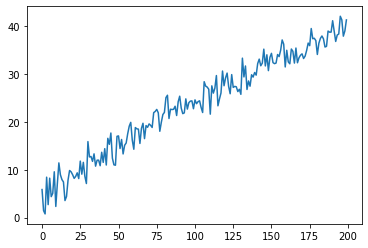

In [3]:
func = np.random.rand(200, 1) * 5
x = []

for i in range(200):
    x.append(i)
    
    if np.isinf(function(i)):
        func[i] = np.random.rand() * 2
    else:
        func[i] += function(i)

plt.plot(x, func)
plt.show()

In [4]:
x_data = []
y_data = []

for i in range(200-11):
    x_data.append([i[0] for i in func[i : i+10].tolist()])
    y_data.append(func[i+11])

x_data = np.array(x_data)
y_data = np.array(y_data)

In [5]:
print(x_data)

[[ 5.86620265  1.45673061  0.76658994 ...  5.07899582  9.58456499
   2.32922913]
 [ 1.45673061  0.76658994  8.45355631 ...  9.58456499  2.32922913
   7.06336953]
 [ 0.76658994  8.45355631  2.71022095 ...  2.32922913  7.06336953
  11.44354615]
 ...
 [35.83174537 39.03549341 38.79858422 ... 38.1996192  38.41384799
  42.13140771]
 [39.03549341 38.79858422 38.80758362 ... 38.41384799 42.13140771
  41.38051825]
 [38.79858422 38.80758362 41.19603366 ... 42.13140771 41.38051825
  37.96208452]]


In [6]:
print(y_data.shape)

(189, 1)


In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(256, input_shape=(10,), activation='relu'))
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation=None))
model.compile(loss='MSE', optimizer='adam', metrics=['mean_absolute_percentage_error'])

Epoch 1/100
3/3 [==============================] - 0s 25ms/step - loss: 0.0496 - mean_absolute_percentage_error: 0.6991
Epoch 2/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0480 - mean_absolute_percentage_error: 0.7435
Epoch 3/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0554 - mean_absolute_percentage_error: 0.7305
Epoch 4/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0482 - mean_absolute_percentage_error: 0.6969
Epoch 5/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0428 - mean_absolute_percentage_error: 0.6730
Epoch 6/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0246 - mean_absolute_percentage_error: 0.5005
Epoch 7/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0217 - mean_absolute_percentage_error: 0.5368
Epoch 8/100
3/3 [==============================] - 0s 32ms/step - loss: 0.0356 - mean_absolute_percentage_error: 0.6222
Epoch 9/100
3/3 [=======================

3/3 [==============================] - 0s 27ms/step - loss: 0.0043 - mean_absolute_percentage_error: 0.1890
Epoch 69/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0041 - mean_absolute_percentage_error: 0.1767
Epoch 70/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0053 - mean_absolute_percentage_error: 0.1906
Epoch 71/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0059 - mean_absolute_percentage_error: 0.2247
Epoch 72/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0041 - mean_absolute_percentage_error: 0.1803
Epoch 73/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0056 - mean_absolute_percentage_error: 0.2428
Epoch 74/100
3/3 [==============================] - 0s 24ms/step - loss: 0.0042 - mean_absolute_percentage_error: 0.1843
Epoch 75/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0066 - mean_absolute_percentage_error: 0.2489
Epoch 76/100
3/3 [===========================

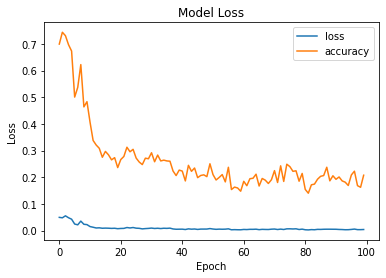

In [46]:
history = model.fit(x_data, y_data, epochs=100, batch_size=63, verbose=1)
plt.plot(history.history['loss'])
plt.plot(history.history['mean_absolute_percentage_error'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

In [47]:
y_pred = []

for i in range(200-11):
    q = (np.array([[i[0] for i in func[i : i+10].tolist()],]))
    y_pred.append(model.predict(q)[0][0])

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 18ms/step


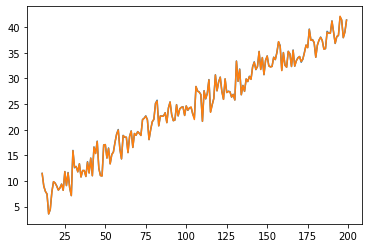

In [48]:
plt.plot(x[11:], y_pred, x[11:], func[11:])
plt.show()

In [49]:
model.predict(x_data).flatten()

6/6 [==============================] - 0s 5ms/step


array([11.467477 ,  8.9921   ,  7.9600096,  7.420972 ,  3.5636182,
        4.435811 ,  7.866637 ,  9.854146 ,  9.591504 ,  9.01109  ,
        8.215274 ,  8.645297 ,  9.386082 ,  8.175486 , 11.824035 ,
        9.106421 , 11.641645 ,  8.657664 ,  7.144126 , 15.952196 ,
       12.565713 , 12.835615 , 11.784729 , 13.351875 , 10.780467 ,
       12.034167 , 12.032782 , 10.886315 , 13.7549   , 11.560408 ,
       14.459446 , 11.021051 , 16.62513  , 15.410521 , 17.759777 ,
       12.464463 , 11.058448 , 10.98145  , 17.013834 , 17.084719 ,
       14.479476 , 16.421871 , 13.346045 , 15.160333 , 15.659487 ,
       17.549646 , 19.16704  , 20.022602 , 16.244484 , 14.298846 ,
       18.884132 , 18.517263 , 18.52578  , 15.541934 , 18.683987 ,
       19.756    , 16.542854 , 19.24047  , 18.914463 , 19.629921 ,
       19.281555 , 18.909061 , 21.982388 , 22.238316 , 22.690632 ,
       21.947828 , 18.069519 , 19.975819 , 21.516771 , 22.030651 ,
       25.130985 , 25.742523 , 20.766613 , 22.672478 , 22.6487

In [50]:
y_data.flatten()

array([11.44354615,  8.96382896,  7.95324706,  7.45212422,  3.56053942,
        4.42405622,  7.86026327,  9.85650765,  9.57082186,  8.9727253 ,
        8.20398498,  8.62035239,  9.36382855,  8.16001234, 11.81600598,
        9.08176139, 11.55808334,  8.63285673,  7.12551275, 15.90075897,
       12.6879842 , 12.78580413, 11.76138486, 13.33559494, 10.76063926,
       12.00959835, 12.02042914, 10.85483369, 13.66803606, 11.54773253,
       14.42091887, 10.9982724 , 16.58600794, 15.3270783 , 17.69507754,
       12.42429982, 11.03671742, 10.95614703, 17.00556646, 17.08813399,
       14.44696895, 16.3425182 , 13.31768977, 15.1269432 , 15.60790577,
       17.53569285, 19.11842601, 19.92327664, 16.20595262, 14.29959474,
       18.83734008, 18.56755102, 18.5109166 , 15.5107643 , 18.67909969,
       19.73700259, 16.52282424, 19.25135744, 18.89054292, 19.59827395,
       19.30311609, 18.85616311, 21.9607308 , 22.20756707, 22.63586924,
       21.9168044 , 18.05808641, 19.95988423, 21.56757879, 22.00